<a href="https://colab.research.google.com/github/acanetti/Profiler/blob/master/Vizu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import os    
from IPython.display import clear_output
PATH ='drive/My Drive/data' 
import wordcloud
import matplotlib.pyplot as plt 
from ipywidgets import interact  
import time  
import sys
%matplotlib inline  
import joblib
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
os.listdir(PATH)

['democratie_clean.csv',
 'animation_death2.mp4',
 'COVID19_2020_open_line_list.gsheet',
 'twitter-2010-ids.csv.zip',
 'twitter_100M',
 'gender_array.job']

In [3]:
df=pd.read_csv(PATH + '/democratie_clean.csv') 
df['gender']=joblib.load(PATH +'/gender_array.job')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
data_gender = df[['title','authorZipCode','gender']]

In [0]:
localisation=pd.read_csv('https://raw.githubusercontent.com/acanetti/Profiler/master/localisation.csv',sep=';')

In [0]:
loc=localisation[['code_postal','region']]

In [0]:
df=df[df['gender']!='None']

In [0]:
Question = df.columns[3:-1]
Titre = df.columns[1]  
Zipcode=df.columns[2]
df_question = df[Question].replace('//',np.nan)
def cleanse_talk(): 
    talk=[]
    for i in range(df.shape[0]): 
        tmp_df = df_question.iloc[i].dropna().values
        try :  
            tmp_val=''
            for char in tmp_df: 
                charstr=str(char) 
                if charstr[-1] != '.':
                    tmp_val += charstr +'. ' 
                else : 
                    tmp_val +=  charstr + ' '
            talk.append(tmp_val)
        except :  
            talk.append('None') 
    return talk 


In [0]:
text=cleanse_talk()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
vectorizer=TfidfVectorizer(min_df=0.001,max_df=0.7,  max_features=20000) 

In [13]:
X=vectorizer.fit_transform(text)  
X

<23764x17788 sparse matrix of type '<class 'numpy.float64'>'
	with 7445914 stored elements in Compressed Sparse Row format>

In [0]:
#X_array=X.astype(np.float32).toarray()

In [0]:
from sklearn.neighbors import NearestNeighbors as NN 
from sklearn.cluster import DBSCAN , KMeans

In [0]:
Km =KMeans(n_clusters=3,n_jobs=-1)

In [17]:
Km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
Km.labels_

array([0, 1, 0, ..., 0, 1, 0], dtype=int32)

In [19]:
df['cluster']=Km.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df.to_csv('df_with_cluster.csv',sep=';')

In [0]:
def create_list_cloud(k):
    df_=df[df['cluster']==k]
    concat_all='' 
    for ki in range(37): 
        concat_all += df_[f'Q_{ki}'] + ' % '


    awesome_mega_list= []
    for i in concat_all :  
        tmp_str = i.split(' ') 
        for val in tmp_str: 
            if len(val) > 4 :
                awesome_mega_list.append(val)
    return awesome_mega_list

In [0]:
list_1= create_list_cloud(0)
list_2= create_list_cloud(1) 
list_3=create_list_cloud(2)

In [0]:
from collections import Counter 
from PIL import Image 

In [0]:
def dict_for_cloud(listing,n_max=200): 
    vocab_count = Counter(listing).most_common(n_max) 
    Voc_mc = {elem[0] : elem[1] for elem in vocab_count} 
    return Voc_mc 

In [0]:
dic1 = dict_for_cloud(list_1)
dic2 = dict_for_cloud(list_2)
dic3 = dict_for_cloud(list_3)

In [0]:
import wordcloud
def generatecloud(dict_text):
    wc_com = wordcloud.WordCloud(background_color="white",
                width=1000,height=1000,
                max_words=300,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_text) 
    return wc_com

In [0]:
cloud_1 = generatecloud(dic1)
cloud_2 = generatecloud(dic2)
cloud_3 = generatecloud(dic3)

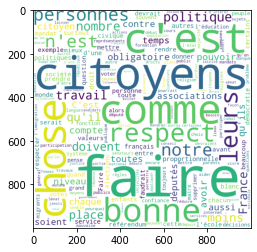

In [63]:
plt.imshow(cloud_1) 
plt.title('Cluster 1 ') 
plt.show()

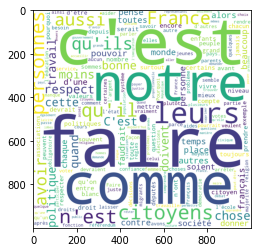

In [64]:
plt.imshow(cloud_2) 
plt.title('Cluster 2 ') 
plt.show()

Text(0.5, 1.0, 'Cluster 3 ')

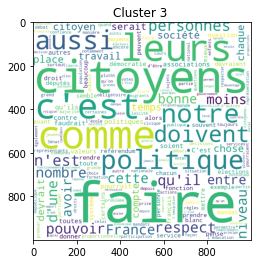

In [84]:
plt.imshow(cloud_3)
plt.title('Cluster 3 ') 
plt.show()

In [0]:
data_1 = pd.DataFrame(dic1.items() , columns=['mot','count']).set_index('mot')
data_2 = pd.DataFrame(dic2.items() , columns=['mot','count']).set_index('mot')
data_3 = pd.DataFrame(dic3.items() , columns=['mot','count']).set_index('mot')

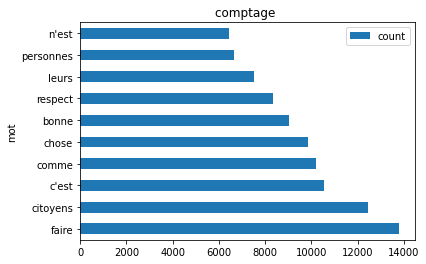

In [75]:
data_1.iloc[:10].plot(kind='barh', title='comptage  : Cluster 1 ') 
plt.show()

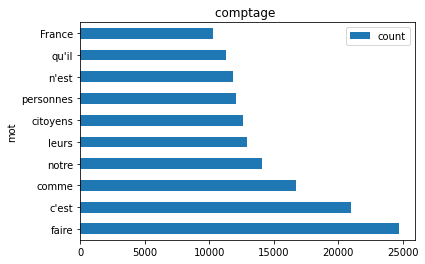

In [76]:
data_2.iloc[:10].plot(kind='barh', title='comptage : Cluster2  ') 
plt.show()

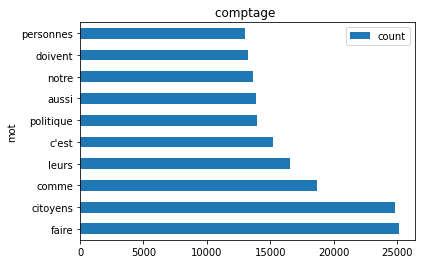

In [77]:
data_3.iloc[:10].plot(kind='barh', title='comptage : Cluster 3 ') 
plt.show()

In [0]:
data_freq1=data_1['count']/data_1['count'].sum()
data_freq2=data_2['count']/data_2['count'].sum()
data_freq3=data_3['count']/data_3['count'].sum()

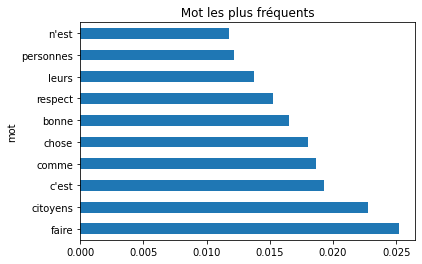

In [81]:
data_freq1.iloc[:10].plot(kind='barh', title=' Mot les plus fréquents : Cluster 1') 

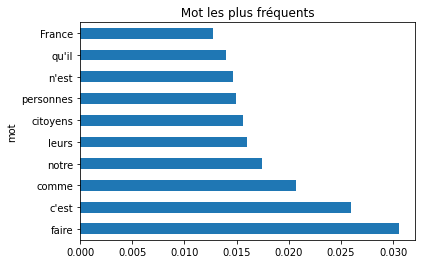

In [82]:
data_freq2.iloc[:10].plot(kind='barh', title=' Mot les plus fréquents: Cluster 2 ') 

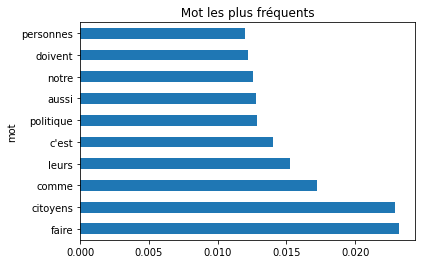

In [83]:
data_freq3.iloc[:10].plot(kind='barh', title=' Mot les plus fréquents :  Cluster3') 